# Training Data Experimentation

###### Noah Himed

Here we will be testing how to import our training data for the NIC model.

In [29]:
from pycocotools import coco
from os import path

import itertools
import matplotlib.pyplot as plt
import random
import skimage.io as io

Load the COCO dataset into memory.

In [56]:
data_dir = path.join(path.expanduser("~"), "Dev", "data", "coco")
dataset_name = "train2014"
instances_annotation_f = path.join(data_dir, "annotations",
                                   f"instances_{dataset_name}.json")
captions_annotation_f = path.join(data_dir, "annotations",
                                  f"captions_{dataset_name}.json")

# Load the COCO dataset annotations into memory.
coco_instances = coco.COCO(instances_annotation_f)
coco_captions = coco.COCO(captions_annotation_f)

loading annotations into memory...
Done (t=8.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


Display all categories.

In [50]:
categories = coco_instances.loadCats(coco_instances.getCatIds())
category_names = [category["name"] for category in categories]
print(", ".join(category_names))

person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush


Display a random image of a cake, airplane, or wine glass (because why not) and its caption.

Fighter jet parked on grass among many planes.
A twin tailed jet aircraft with Cryllic writing on it.
A group of airplanes parked on  a field.
an air plane on a field with other planes
A small ultralight plane at rest on a field outside an airport hangar.


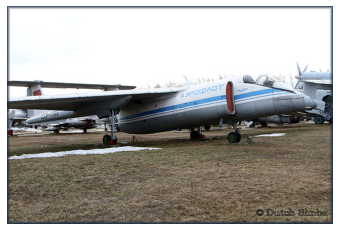

In [67]:
# Create a list of image IDs of images belonging to the named categories.
category_ids = coco_instances.getCatIds(catNms=["airplane", "cake",
                                                "wine glass"])
category_img_ids = [coco_instances.catToImgs[id] for id in category_ids]
img_ids = list(itertools.chain(*category_img_ids)) 

# Choose a random image from the above list and display it.
rand_img_idx = random.choice(img_ids)
rand_img = coco_instances.loadImgs(rand_img_idx)[0]
rand_img_f = path.join(data_dir, "images", dataset_name, rand_img["file_name"])
rand_img_data = io.imread(rand_img_f)
plt.axis("off")
plt.imshow(rand_img_data)

# Display the image's possible captions.
rand_img_annotation_id = coco_captions.getAnnIds(imgIds=rand_img["id"])
captions = coco_captions.loadAnns(rand_img_annotation_id)
coco_captions.showAnns(captions)

plt.show()